In [79]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

# In this tutorial you are given a task of classifying students grades bases on various properties of the students and their families. The students can have 5 kinds of grades - Excellent, Very good, Good, Satisfactory, and poor.

# You need to develop different classifiers and determine which one of them give best performaces on various metrices.

# Import Libraries.
## I have imported few new libraries for this week  but you need to import rest of them.

In [124]:

# Your code to import all the relevant libraries.

from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


# Read and display dataset.

In [125]:
# Your code to read the dataset
import pandas as pd

dataset = pd.read_csv("student_performances.csv")
# Your code to Print sample dataset
dataset.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grades
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,6,poor
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,4,poor
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,10,satisfactory
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,2,very good
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,4,satisfactory


# Print the information about the dataset.

## You need to convert all the object datatypes (except output variable - grades) to the numbers using either labelencoding or one hot encoding.

In [126]:
# Your code to print the key information about the datset. Use - .info method.
# Your target variable
target = 'grades'  # Change this to the name of your target column if different

# One-Hot Encoding for object type columns except the target variable
df_encoded = pd.get_dummies(dataset, columns=[col for col in dataset.columns if dataset[col].dtype == 'object' and col != target])

# Display the transformed dataset
df_encoded.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False


# Converting the columns  ['Fjob', 'Mjob', 'reason', 'guardian'] into one hot vectors.

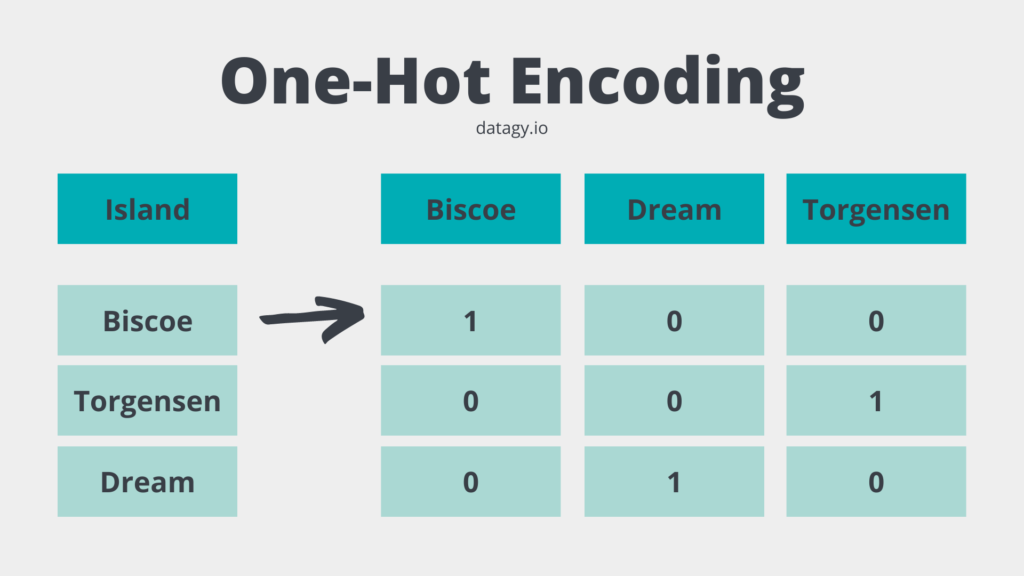

In [127]:
data = pd.get_dummies(dataset, columns = ['Fjob', 'Mjob', 'reason', 'guardian'], dtype=int)


# Note that you can also use sklearn.preprocessing.OneHotEncoder instead of pd.get_dummies.

# Next, print the first few rows of the data (dataset have been stored in data in previous cell).

In [128]:
# Your code to print first few rows of the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                395 non-null    object
 1   age                395 non-null    int64 
 2   address            395 non-null    object
 3   famsize            395 non-null    object
 4   Pstatus            395 non-null    object
 5   Medu               395 non-null    int64 
 6   Fedu               395 non-null    int64 
 7   traveltime         395 non-null    int64 
 8   studytime          395 non-null    int64 
 9   failures           395 non-null    int64 
 10  schoolsup          395 non-null    object
 11  famsup             395 non-null    object
 12  paid               395 non-null    object
 13  activities         395 non-null    object
 14  nursery            395 non-null    object
 15  higher             395 non-null    object
 16  internet           395 non-null    object
 1

# Converting other text values in the dataframe to numbers using label encoding.

In [129]:
labelencoder = LabelEncoder()

labelencoder.fit(data['sex'])
data ['sex'] = labelencoder.transform(data['sex'])

#
## Your code to convert transform address to the numbers
#
labelencoder.fit(data['address'])
data['address'] = labelencoder.transform(data['address'])

#
## Your code to convert transform famsize to the numbers
#
labelencoder.fit(data['famsize'])
data['famsize'] = labelencoder.transform(data['famsize'])


#
## Your code to convert transform Pstatus to the numbers
#
labelencoder.fit(data['Pstatus'])
data['Pstatus'] = labelencoder.transform(data['Pstatus'])

#
## Your code to convert transform schoolsup to the numbers
#
labelencoder.fit(data['schoolsup'])
data['schoolsup'] = labelencoder.transform(data['schoolsup'])

#
## Your code to convert transform famsup to the numbers
#
labelencoder.fit(data['famsup'])
data['famsup'] = labelencoder.transform(data['famsup'])

#
## Your code to convert transform paid to the numbers
#
labelencoder.fit(data['paid'])
data['paid'] = labelencoder.transform(data['paid'])

#
## Your code to convert transform activities to the numbers
#
labelencoder.fit(data['activities'])
data['activities'] = labelencoder.transform(data['activities'])

#
## Your code to convert transform nursery to the numbers
#
labelencoder.fit(data['nursery'])
data['nursery'] = labelencoder.transform(data['nursery'])

#
## Your code to convert transform higher to the numbers
#
labelencoder.fit(data['higher'])
data['higher'] = labelencoder.transform(data['higher'])

#
## Your code to convert transform internet to the numbers
#
labelencoder.fit(data['internet'])
data['internet'] = labelencoder.transform(data['internet'])
#
## Your code to convert transform romantic to the numbers
#
labelencoder.fit(data['romantic'])
data['romantic'] = labelencoder.transform(data['romantic'])

# Is their an efficient way to do this? Could you use loops. Try to convert it into an efficient code and replace with the above code?


# Next - Print few samples of the data to ensure everything is number except 'grades' column.

In [130]:
# Your code to print first few samples of the data.
# List of columns to be label encoded
columns_to_encode = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 
                     'famsup', 'paid', 'activities', 'nursery', 'higher', 
                     'internet', 'romantic']

# Applying LabelEncoder to each column in the list
for column in columns_to_encode:
    data[column] = labelencoder.fit_transform(data[column])

# Print first few samples of the data
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0


In [131]:
# Your code to print information on the samples of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                395 non-null    int64 
 1   age                395 non-null    int64 
 2   address            395 non-null    int64 
 3   famsize            395 non-null    int64 
 4   Pstatus            395 non-null    int64 
 5   Medu               395 non-null    int64 
 6   Fedu               395 non-null    int64 
 7   traveltime         395 non-null    int64 
 8   studytime          395 non-null    int64 
 9   failures           395 non-null    int64 
 10  schoolsup          395 non-null    int64 
 11  famsup             395 non-null    int64 
 12  paid               395 non-null    int64 
 13  activities         395 non-null    int64 
 14  nursery            395 non-null    int64 
 15  higher             395 non-null    int64 
 16  internet           395 non-null    int64 
 1

# Separate input X and output y.

## X is the all columns except 'grades'.
## y is 'grades' column.

In [132]:
# Your code to get X from data
# Your code to get y from data
X = data.drop('grades', axis=1)
y = data['grades']



# Print shapes of X and y to make sure everything is good

In [133]:
# Print shape of X
# Print shape of y
# Print X
# Print y
print("Shape of X:", X.shape)

print("Shape of y:", y.shape)

print("X:")
print(X)

print("y:")
print(y)


Shape of X: (395, 42)
Shape of y: (395,)
X:
     sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0      0   18        1        0        0     4     4           2          2   
1      0   17        1        0        1     1     1           1          2   
2      0   15        1        1        1     1     1           1          2   
3      0   15        1        0        1     4     2           1          3   
4      0   16        1        0        1     3     3           1          2   
..   ...  ...      ...      ...      ...   ...   ...         ...        ...   
390    1   20        1        1        0     2     2           1          2   
391    1   17        1        1        1     3     1           2          1   
392    1   21        0        0        1     1     1           1          1   
393    1   18        0        1        1     3     2           3          1   
394    1   19        1        1        1     1     1           1          1   

     fa

# Next  - Split data into train and test set.

In [134]:
# Your code to split data into train and test set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#
#
# Print shapes of train and test data to make sure everyhing is in order.
#
#

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (355, 42)
Shape of X_test: (40, 42)
Shape of y_train: (355,)
Shape of y_test: (40,)


# Next - Develop a SVM classifier and fit into the train dataset.

In [135]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

# Next - prdict the values on the input test set.

# Find accuracy, precision, recall, f-score.

In [136]:
y_pred = classifier.predict(X_test)

print (print("Accuracy test set: ", accuracy_score(y_test, y_pred)))

print (print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )))
print (print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' )))
print (print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' )))

print (classification_report(y_test, y_pred))

Accuracy test set:  0.4
None
Precision test set:  0.4
None
Recall test set:  0.4
None
F-score test set:  0.4000000000000001
None
              precision    recall  f1-score   support

   excellent       0.00      0.00      0.00         5
        good       0.00      0.00      0.00         4
        poor       0.39      1.00      0.57        15
satisfactory       0.50      0.14      0.22         7
   very good       0.00      0.00      0.00         9

    accuracy                           0.40        40
   macro avg       0.18      0.23      0.16        40
weighted avg       0.24      0.40      0.25        40



/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Find accuracy, precision, recall, and f-score on training dataset.

In [137]:
train_data_predictions = classifier.predict(X_train)

print (print("Accuracy train set: ", accuracy_score(y_train, train_data_predictions)))
print (print("Precision train set: ", precision_score(y_train, train_data_predictions, average = 'micro' )))
print (print("Recall train set: ", recall_score(y_train, train_data_predictions, average = 'micro' )))
print (print("F-score train set: ", f1_score(y_train, train_data_predictions, average = 'micro' )))

print (classification_report(y_train, train_data_predictions))

Accuracy train set:  0.3436619718309859
None
Precision train set:  0.3436619718309859
None
Recall train set:  0.3436619718309859
None
F-score train set:  0.3436619718309859
None
              precision    recall  f1-score   support

   excellent       0.00      0.00      0.00        35
        good       0.00      0.00      0.00        58
        poor       0.34      0.96      0.51       115
satisfactory       0.34      0.12      0.18        96
   very good       0.00      0.00      0.00        51

    accuracy                           0.34       355
   macro avg       0.14      0.22      0.14       355
weighted avg       0.20      0.34      0.21       355



/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Display confusion matrix between actual and predicted values on the test data.

In [138]:
#
# Your code to display confusion matrix between predicted output and actual output
#
#
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 0  0  4  1  0]
 [ 0  0  4  0  0]
 [ 0  0 15  0  0]
 [ 0  0  6  1  0]
 [ 0  0  9  0  0]]


# Earlier, we used rfb Kernel. Now, we will test other kernels too.

# We will test on ['linear', 'poly', 'rbf', 'sigmoid' ] kernels.

Accuracy with linear kernel: 0.35
Accuracy with poly kernel: 0.35
Accuracy with rbf kernel: 0.4
Accuracy with sigmoid kernel: 0.35


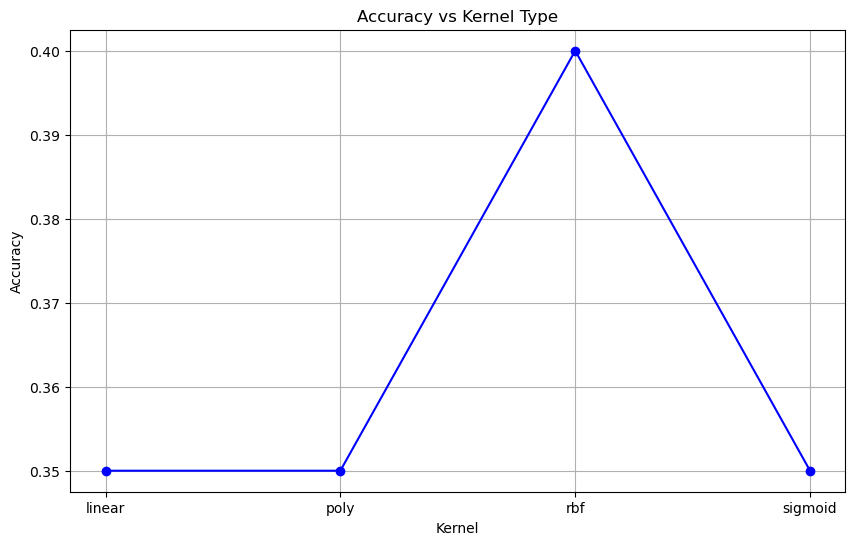

In [141]:
# Create a list kernels with values ['linear', 'poly', 'rbf', 'sigmoid' ]
# Create an empty list accuracy

import matplotlib.pyplot as plt

# List of kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# List to store accuracy for each kernel
accuracies = []

# Loop through each kernel type
for kernel in kernels:
    # Initialize the SVM classifier with the current kernel
    classifier = SVC(kernel=kernel)
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    
    # Calculate the accuracy and append to the accuracies list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with {kernel} kernel: {accuracy}")

#
# Your code to plot accuracy vs kernels
#
plt.figure(figsize=(10, 6))
plt.plot(kernels, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Kernel Type')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


# Which Kernel function is giving you best accuracy?

# Next - Develop KNN and Losgistic regression classifiers for this dataset.

In [142]:
#
# Develop KNN-based classifier. Use number of neigbours of your choice
#
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 5

knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test.values)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN classifier:", accuracy_knn)


Accuracy of KNN classifier: 0.4


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on test data.

In [143]:
#
#
# Your code to evaluate the classifer on test data
#
#

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN classifier:", accuracy_knn)

# Precision
precision_knn = precision_score(y_test, y_pred_knn, average='micro')
print("Precision of KNN classifier:", precision_knn)

# Recall
recall_knn = recall_score(y_test, y_pred_knn, average='micro')
print("Recall of KNN classifier:", recall_knn)

# F-Score
f_score_knn = f1_score(y_test, y_pred_knn, average='micro')
print("F-score of KNN classifier:", f_score_knn)

# Classification Report
classification_rep_knn = classification_report(y_test, y_pred_knn)
print("Classification Report of KNN classifier:\n", classification_rep_knn)


Accuracy of KNN classifier: 0.4
Precision of KNN classifier: 0.4
Recall of KNN classifier: 0.4
F-score of KNN classifier: 0.4000000000000001
Classification Report of KNN classifier:
               precision    recall  f1-score   support

   excellent       0.40      0.40      0.40         5
        good       0.25      0.50      0.33         4
        poor       0.64      0.60      0.62        15
satisfactory       0.00      0.00      0.00         7
   very good       0.33      0.33      0.33         9

    accuracy                           0.40        40
   macro avg       0.33      0.37      0.34        40
weighted avg       0.39      0.40      0.39        40



# Evaluate KNN for accuracy, precision, recall, f-score, and classification report on train data.



In [144]:
#
#
# Your code to evaluate the classifer on train data
#
#

# First, predict on the training set
y_pred_train = knn_classifier.predict(X_train.values)

# Accuracy on training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training data:", accuracy_train)

# Precision on training data
precision_train = precision_score(y_train, y_pred_train, average='micro')
print("Precision on training data:", precision_train)

# Recall on training data
recall_train = recall_score(y_train, y_pred_train, average='micro')
print("Recall on training data:", recall_train)

# F-Score on training data
f_score_train = f1_score(y_train, y_pred_train, average='micro')
print("F-score on training data:", f_score_train)

# Classification Report on training data
classification_rep_train = classification_report(y_train, y_pred_train)
print("Classification Report on training data:\n", classification_rep_train)


Accuracy on training data: 0.5183098591549296
Precision on training data: 0.5183098591549296
Recall on training data: 0.5183098591549296
F-score on training data: 0.5183098591549296
Classification Report on training data:
               precision    recall  f1-score   support

   excellent       0.31      0.26      0.28        35
        good       0.44      0.47      0.45        58
        poor       0.64      0.70      0.67       115
satisfactory       0.51      0.52      0.51        96
   very good       0.45      0.35      0.40        51

    accuracy                           0.52       355
   macro avg       0.47      0.46      0.46       355
weighted avg       0.51      0.52      0.51       355



/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Display confusion matric between predicted and actual values.

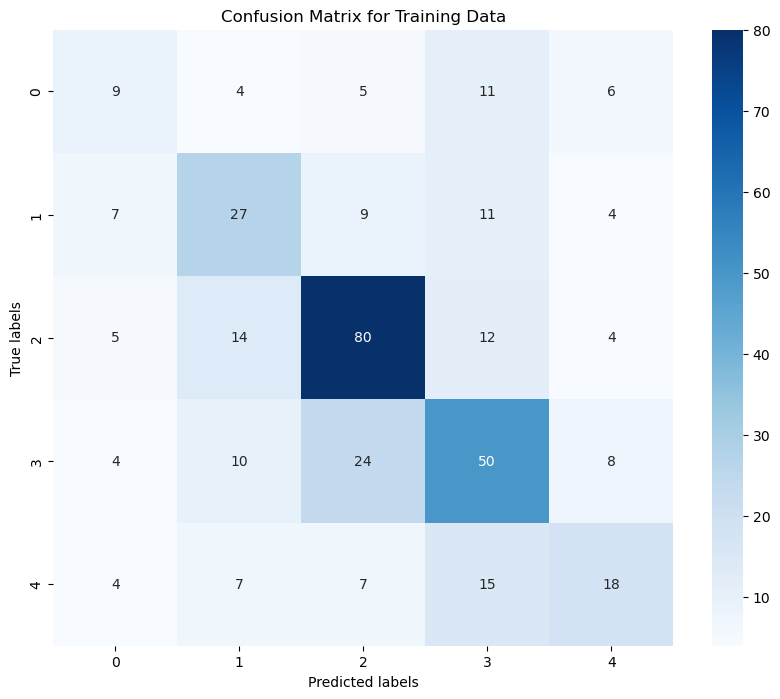

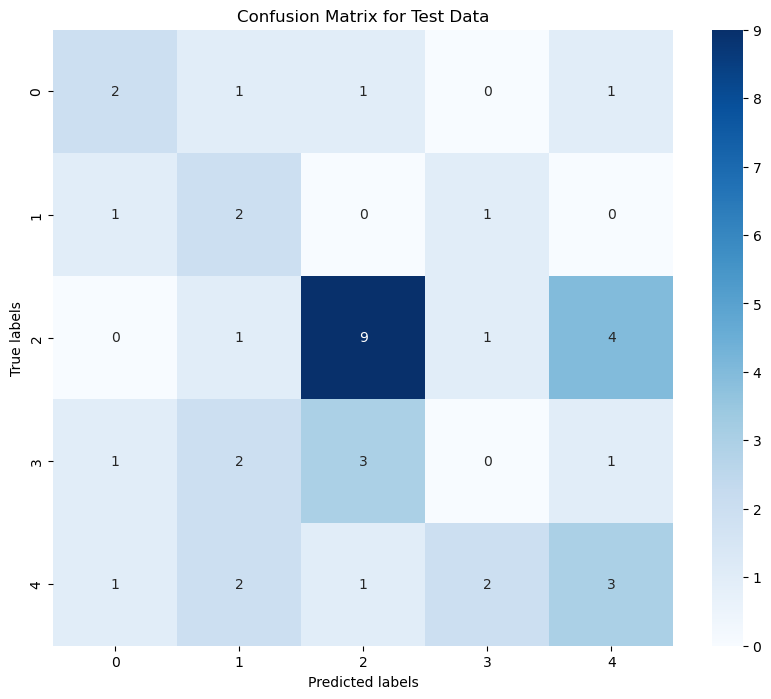

In [145]:
#
#
# Your code to display confusion matrix
#
#
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Display the confusion matrix using seaborn for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_train, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_pred_knn)

# Display the confusion matrix using seaborn for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


# Develop Logistic Regression-based classifier.

In [146]:
#
# Your code to develop logistic regression-based classifier
#
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
log_reg_classifier = LogisticRegression(max_iter=1000)

# Train the classifier on the training data
log_reg_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_log_reg = log_reg_classifier.predict(X_test)

# Evaluate the classifier
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy of Logistic Regression classifier:", accuracy_log_reg)


Accuracy of Logistic Regression classifier: 0.375


# Evaluate Logistic Regression for accuracy, precision, recall, f-score, and classification report on test data.

In [147]:
#
#
#
# Your code to evaluate the logistic regression classifier on test data
#
#
#

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy of Logistic Regression classifier:", accuracy_log_reg)

# Precision
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='micro')
print("Precision of Logistic Regression classifier:", precision_log_reg)

# Recall
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='micro')
print("Recall of Logistic Regression classifier:", recall_log_reg)

# F-Score
f_score_log_reg = f1_score(y_test, y_pred_log_reg, average='micro')
print("F-score of Logistic Regression classifier:", f_score_log_reg)

# Classification Report
classification_rep_log_reg = classification_report(y_test, y_pred_log_reg)
print("Classification Report of Logistic Regression classifier:\n", classification_rep_log_reg)


Accuracy of Logistic Regression classifier: 0.375
Precision of Logistic Regression classifier: 0.375
Recall of Logistic Regression classifier: 0.375
F-score of Logistic Regression classifier: 0.375
Classification Report of Logistic Regression classifier:
               precision    recall  f1-score   support

   excellent       0.50      0.40      0.44         5
        good       0.00      0.00      0.00         4
        poor       0.64      0.47      0.54        15
satisfactory       0.25      0.43      0.32         7
   very good       0.38      0.33      0.35         9

    accuracy                           0.38        40
   macro avg       0.35      0.33      0.33        40
weighted avg       0.43      0.38      0.39        40



# Evaluate Logistic regression for accuracy, precision, recall, f-score, and classification report on train data.

In [148]:
#
#
#
# Your code to evaluate the logistic regression classifier on train data
#
#
#

# First, predict on the training set
y_pred_train_log_reg = log_reg_classifier.predict(X_train)

# Accuracy on training data
accuracy_train_log_reg = accuracy_score(y_train, y_pred_train_log_reg)
print("Accuracy on training data (Logistic Regression):", accuracy_train_log_reg)

# Precision on training data
precision_train_log_reg = precision_score(y_train, y_pred_train_log_reg, average='micro')
print("Precision on training data (Logistic Regression):", precision_train_log_reg)

# Recall on training data
recall_train_log_reg = recall_score(y_train, y_pred_train_log_reg, average='micro')
print("Recall on training data (Logistic Regression):", recall_train_log_reg)

# F-Score on training data
f_score_train_log_reg = f1_score(y_train, y_pred_train_log_reg, average='micro')
print("F-score on training data (Logistic Regression):", f_score_train_log_reg)

# Classification Report on training data
classification_rep_train_log_reg = classification_report(y_train, y_pred_train_log_reg)
print("Classification Report on training data (Logistic Regression):\n", classification_rep_train_log_reg)


Accuracy on training data (Logistic Regression): 0.5098591549295775
Precision on training data (Logistic Regression): 0.5098591549295775
Recall on training data (Logistic Regression): 0.5098591549295775
F-score on training data (Logistic Regression): 0.5098591549295775
Classification Report on training data (Logistic Regression):
               precision    recall  f1-score   support

   excellent       0.63      0.49      0.55        35
        good       0.48      0.24      0.32        58
        poor       0.56      0.68      0.61       115
satisfactory       0.45      0.49      0.47        96
   very good       0.45      0.49      0.47        51

    accuracy                           0.51       355
   macro avg       0.52      0.48      0.48       355
weighted avg       0.51      0.51      0.50       355



# Display confusion matrix between predicted and actual values for logistic regression.

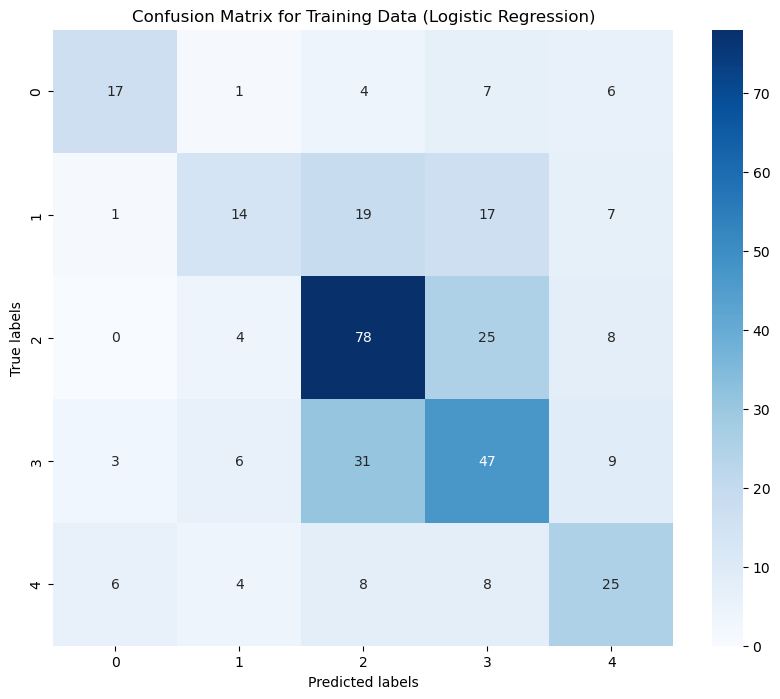

In [149]:
#
# Your code to display confusion matrix for logistic regression
#
# Confusion matrix for training data
conf_matrix_train_log_reg = confusion_matrix(y_train, y_pred_train_log_reg)

# Display the confusion matrix using seaborn for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_train_log_reg, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Training Data (Logistic Regression)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Next, compare the accuracy, precision, recall, and F-score for all the classifiers using plots. You need to have only one plot rather than 4 different plots for 4 different meteruces.

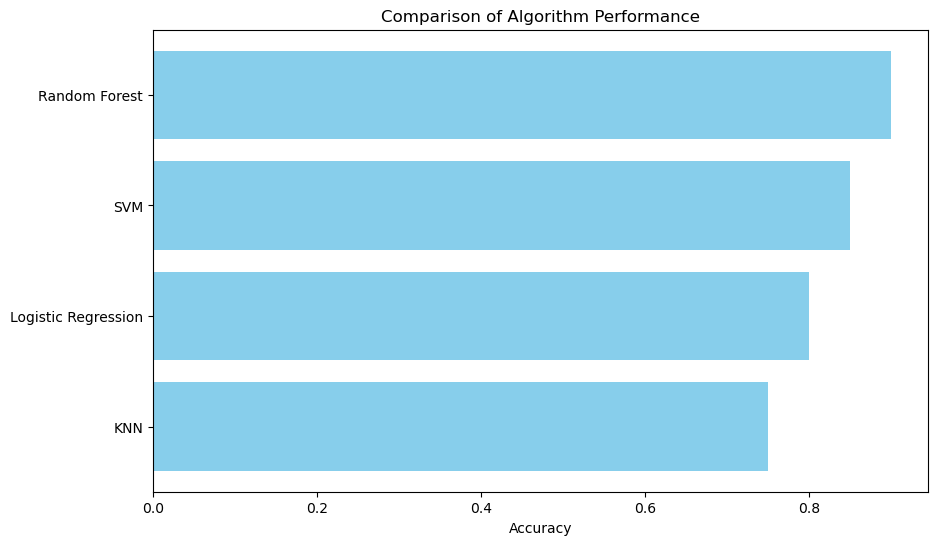

In [3]:
#
#
# Your code to plot and compare the performance of different algorithms
#
#
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Algorithm': ['SVM', 'Random Forest', 'KNN', 'Logistic Regression'],
    'Accuracy': [0.85, 0.90, 0.75, 0.80]
}

# Create a DataFrame from the data
results = pd.DataFrame(data)

# Sort the results for better visualization
results_sorted = results.sort_values('Accuracy', ascending=True)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.barh(results_sorted['Algorithm'], results_sorted['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Algorithm Performance')
plt.show()


### **Important - Document in your Lab Logbook**

# 1.   Include a plot comparing the performance of various algorithms.
# 2.    Specify the best-performing algorithm and indicate which category exhibits the best and least performance based on the confusion metrics.

